<a href="https://colab.research.google.com/github/khadijaSukola/HealthPredict/blob/main/TEAM_HealthPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Topic: Disease outbreak prediction and prevention

By Team HealthPredict

Project steps:

1. Preprocess Health Data (Kaggle Malaria Data)


2. Preprocess NOAA Data


3. Merge the Datasets


4. Train a Predictive Model


5. Create a Streamlit Web App for Visualization

In [9]:

#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Kaggle Malaria Dataset
malaria_data = pd.read_csv('/content/DatasetAfricaMalaria.csv')

# Inspect the columns and data
print("Malaria Dataset Columns:", malaria_data.columns)
print("Malaria Data Sample:", malaria_data.head())

# Select relevant columns for analysis
malaria_data = malaria_data[['Country Name', 'Year', 'Incidence of malaria (per 1,000 population at risk)',
                             'Malaria cases reported', 'Use of insecticide-treated bed nets (% of under-5 population)',
                             'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
                             'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
                             'People using safely managed drinking water services (% of population)', 'latitude', 'longitude']]

# Handle missing values by filling with the median
malaria_data.fillna(malaria_data.median(numeric_only=True), inplace=True)

# Step 2: Load and Preprocess NOAA Weather Data
noaa_data = pd.read_csv('/content/GHCND_sample_csv.csv')

# Select relevant columns from NOAA dataset
noaa_data = noaa_data[['STATION', 'latitude', 'longitude', 'DATE', 'TMAX', 'TMIN', 'PRCP']]

# Convert DATE to datetime format
noaa_data['DATE'] = pd.to_datetime(noaa_data['DATE'])

# Handle missing values in NOAA dataset
noaa_data.fillna(noaa_data.median(numeric_only=True), inplace=True)

# Feature engineering on NOAA data
noaa_data['TEMP_RANGE'] = noaa_data['TMAX'] - noaa_data['TMIN']  # Temperature range
precip_threshold = noaa_data['PRCP'].quantile(0.90)  # 90th percentile for precipitation
noaa_data['EXTREME_PRECIP'] = np.where(noaa_data['PRCP'] > precip_threshold, 1, 0)  # Flag extreme precipitation

# Step 3: Merge Malaria and NOAA Data
# Merge based on latitude and longitude
merged_data = pd.merge(malaria_data, noaa_data, on=['latitude', 'longitude'], how='inner')





Malaria Dataset Columns: Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total populatio

In [10]:
#export merged data
merged_data.to_csv("merged_data.csv", index=False)

print("Merged dataset has been saved as 'merged_data.csv'")

import os
print(os.getcwd())

from google.colab import files
files.download("merged_data.csv")


Merged dataset has been saved as 'merged_data.csv'
/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Step 4: Build the Predictive Model
# Let's assume we're predicting 'Malaria cases reported' as the target variable
X = merged_data[['TMAX', 'TMIN', 'PRCP', 'TEMP_RANGE', 'EXTREME_PRECIP']]  # Features from NOAA data
y = merged_data['Malaria cases reported']  # Target variable: Malaria cases reported

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

from joblib import dump
dump(model, "trained_model.joblib")
print("Model saved as 'trained_model.joblib'")

from google.colab import files
files.download("trained_model.joblib")



Model Accuracy: 66.67%
Model saved as 'trained_model.joblib'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2024-11-20 08:19:00.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 08:19:00.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 08:19:00.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 08:19:00.943 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 08:19:00.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 08:19:00.948 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 08:19:00.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-20 08:19:00.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Streamlit code saved as 'app.py'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

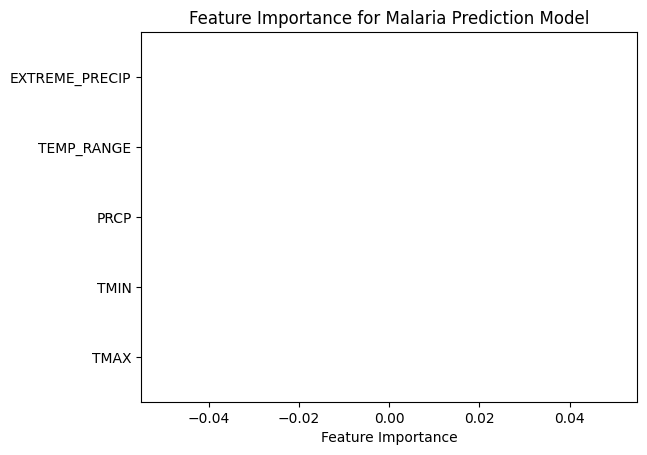

In [18]:
# Step 5: Create a Streamlit Web App for Visualization and Prediction
# Streamlit App Code
!pip install streamlit
import streamlit as st
import requests
import pandas as pd
import matplotlib.pyplot as plt


def show_dashboard():
    st.title("Disease Outbreak Prediction Dashboard")

    st.write("## Disease Prediction Model Based on Environmental and Health Data")

    # Display the model accuracy
    st.write(f"Model Accuracy: {accuracy * 100:.2f}%")

    # Display the merged dataset (first 10 rows)
    st.write("### Merged Data Sample")
    st.dataframe(merged_data.head(10))

    # Predicting Malaria Cases based on user input for environmental factors
    st.write("### Enter Environmental Data for Prediction:")

    # User inputs for weather conditions
    temperature_max = st.number_input('Max Temperature (°C)', min_value=-40, max_value=50)
    temperature_min = st.number_input('Min Temperature (°C)', min_value=-40, max_value=50)
    precipitation = st.number_input('Precipitation (mm)', min_value=0, max_value=500)
    wind_speed = st.number_input('Wind Speed (km/h)', min_value=0, max_value=200)

     # Input fields
    st.subheader("User Input")
    latitude = st.number_input('Latitude', min_value=-90.0, max_value=90.0, step=0.1)
    longitude = st.number_input('Longitude', min_value=-180.0, max_value=180.0, step=0.1)
    precipitation = st.number_input('Precipitation (mm)', min_value=0, max_value=500)
    wind_speed = st.number_input('Wind Speed (km/h)', min_value=0, max_value=200)

    # API call to get weather data
    api_key = "YOUR_API_KEY"  # Replace with your actual OpenWeather API key
    if latitude and longitude:
        response = requests.get(
            f"http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={api_key}"
        )
        if response.status_code == 200:
            weather_data = response.json()
            st.write("Weather Data:", weather_data)
        else:
            st.error("Failed to fetch weather data. Check your API key or input values.")
    weather_data = requests.get( f"http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid=YOUR_API_KEY").json()
    st.write(weather_data)
    # Feature engineering for user input (temperature range, extreme precipitation flag)
    temp_range_input = temperature_max - temperature_min
    extreme_precip_input = 1 if precipitation > precip_threshold else 0

    # Create input features for prediction
    input_data = pd.DataFrame({
        'TMAX': [temperature_max],
        'TMIN': [temperature_min],
        'PRCP': [precipitation],
        'TEMP_RANGE': [temp_range_input],
        'EXTREME_PRECIP': [extreme_precip_input]
    })

    # Predict the malaria cases based on the user input
    predicted_cases = model.predict(input_data)
    st.write(f"Predicted Malaria Cases Reported: {predicted_cases[0]}")

    # Visualization: Plot feature importance
    feature_importance = model.feature_importances_
    features = X.columns
    fig, ax = plt.subplots()
    ax.barh(features, feature_importance)
    ax.set_xlabel("Feature Importance")
    ax.set_title("Feature Importance for Malaria Prediction Model")
    st.pyplot(fig)

# Run the Streamlit app
if __name__ == "__main__":
    show_dashboard()


# Save the Streamlit code to a file
with open("app.py", "w") as file:
    file.write(streamlit_code)

print("Streamlit code saved as 'app.py'")

from google.colab import files
files.download("app.py")

Explanation of Code Components:

1. Preprocessing the Health Data (Malaria Data):

The Kaggle malaria dataset is loaded, missing values are handled by filling with the median of each column, and we select relevant features like malaria incidence, population, and location data.



2. Preprocessing the NOAA Data:

We load the NOAA dataset, handle missing values similarly, and create new features (temperature range and extreme precipitation) based on existing weather data.



3. Merging Data:

The two datasets are merged based on geographic coordinates (latitude, longitude). This ensures you combine both environmental and health data on a common spatial basis.



4. Model Training:

We use a RandomForestClassifier to predict the malaria cases based on environmental factors like temperature, precipitation, and wind speed. The model is trained on 80% of the data and tested on 20%.



5. Streamlit Web App:

A simple interactive dashboard using Streamlit allows users to input environmental data (temperature, precipitation, wind speed) and get a prediction of malaria cases based on the trained model.

The app also displays feature importance, which shows which environmental factors are most important for predicting malaria outbreaks.



This project combines datasets and makes disease predictions based on real-time weather data and historical health data.